# Network Data Visualization

The goal of this notebook is to generate visualizations as follows:
    1. Generate a graph of the size of the CaringBridge community over time (Implemented)
    2. Generate a graph of the size of the CaringBridge author community over time.

## Manipulation

In [3]:
import json
import numpy as np
import pandas as pd
import csv as csv
import os
import subprocess
from tqdm import tqdm

pwd = "/home/srivbane/shared/caringbridge/data/projects/sna-social-support/csv_data/"

epoch_day = 86400000        # accounting for milliseconds
rng = 12 * 365 * epoch_day   # we want five years of data, 1.1.2010-1.1.2016
srt = 1104537600000 # jan 1 2005

with open(os.path.join(pwd, "dynamic_ints.csv"), 'r', encoding="utf-8") as ints:
    with open (os.path.join(pwd, "dynamic_auth.csv"), 'r', encoding="utf-8") as auths:
        a = pd.read_csv(auths, index_col = 0, header=None, names=("total", "first", "last"))
        i = pd.read_csv(ints, index_col = 0, header=None, names=("total", "first", "last"))

In [4]:
with open(os.path.join(pwd, "nw_size.csv"), 'w', encoding="utf-8") as w:
    csv_w = csv.writer(w);
    for d in tqdm(range(srt, srt + rng, epoch_day)):               
        a_slice = a.loc[(a["first"] <= d)  & (a["last"] >= d)]
        i_slice = i.loc[(i["first"] <= d) & (i["last"] >= d)]
        l_slice = pd.concat([a_slice, i_slice], axis = 1)
        auth_life = len(a_slice); int_life = len(i_slice); life = len(l_slice)
        csv_w.writerow((d, auth_life, int_life, life))
    print("Done!")

100%|██████████| 4380/4380 [26:46<00:00,  2.73it/s]

Done!


In [6]:
with open(os.path.join(pwd, "nw_size_auth_filtered.csv"), 'w', encoding="utf-8") as w:
    csv_w = csv.writer(w);
    for d in tqdm(range(srt, srt + rng, epoch_day)):               
        a_slice = a.loc[(a["first"] <= d)  & (a["last"] >= d)]
        i_slice = i.loc[(i["first"] <= d) & (i["last"] >= d) & (i.index.isin(a.index))]
        l_slice = pd.concat([a_slice, i_slice], axis = 1)
        auth_life = len(a_slice); int_life = len(i_slice); life = len(l_slice)
        csv_w.writerow((d, auth_life, int_life, life))
    print("Done!")

100%|██████████| 1825/1825 [42:34<00:00,  1.40s/it]

Done!


### Reasoning for concat call
We want a quantity of active users during range <code>[min(first_auth, first_int) <= d <= max(last_auth, last_int)] </code>, where a time d is representative of a slice of time where a user is active or not.
In <code>a_slice</code> and <code>i_slice</code>, we have dataframes of users who are active at a time d. Respectively, the dataframes show users active at <code>first_auth <= d <= last_auth</code> and  <code>first_int <= d <= last_int.</code> Concetaning the two existent dataframes by outer-joining on their axis 1--the uid--will result in the total of user ids who exist at a time d from either the first_auth or first_int (whichever comes first, as it will be present in one of the slices) to, similarly, the last_auth or last_int.

## Visualization

In [12]:
import matplotlib.pyplot as mpl

mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 8
em = 12

In [5]:
with open(os.path.join(pwd, "nw_size.csv"), 'r', encoding='utf-8') as datum:
    df = pd.read_csv(datum, index_col = 0, header=None, names=("Auths", "Ints", "Lifetime"))
with open(os.path.join(pwd, "nw_size_auth_filtered.csv"), 'r', encoding='utf-8') as datum:
    df_filt = pd.read_csv(datum, index_col = 0, header=None, names=("Auths", "Ints", "Lifetime"))

df['Auth + Int'] = df["Auths"] + df["Ints"]
epoch_yr = epoch_day * 365

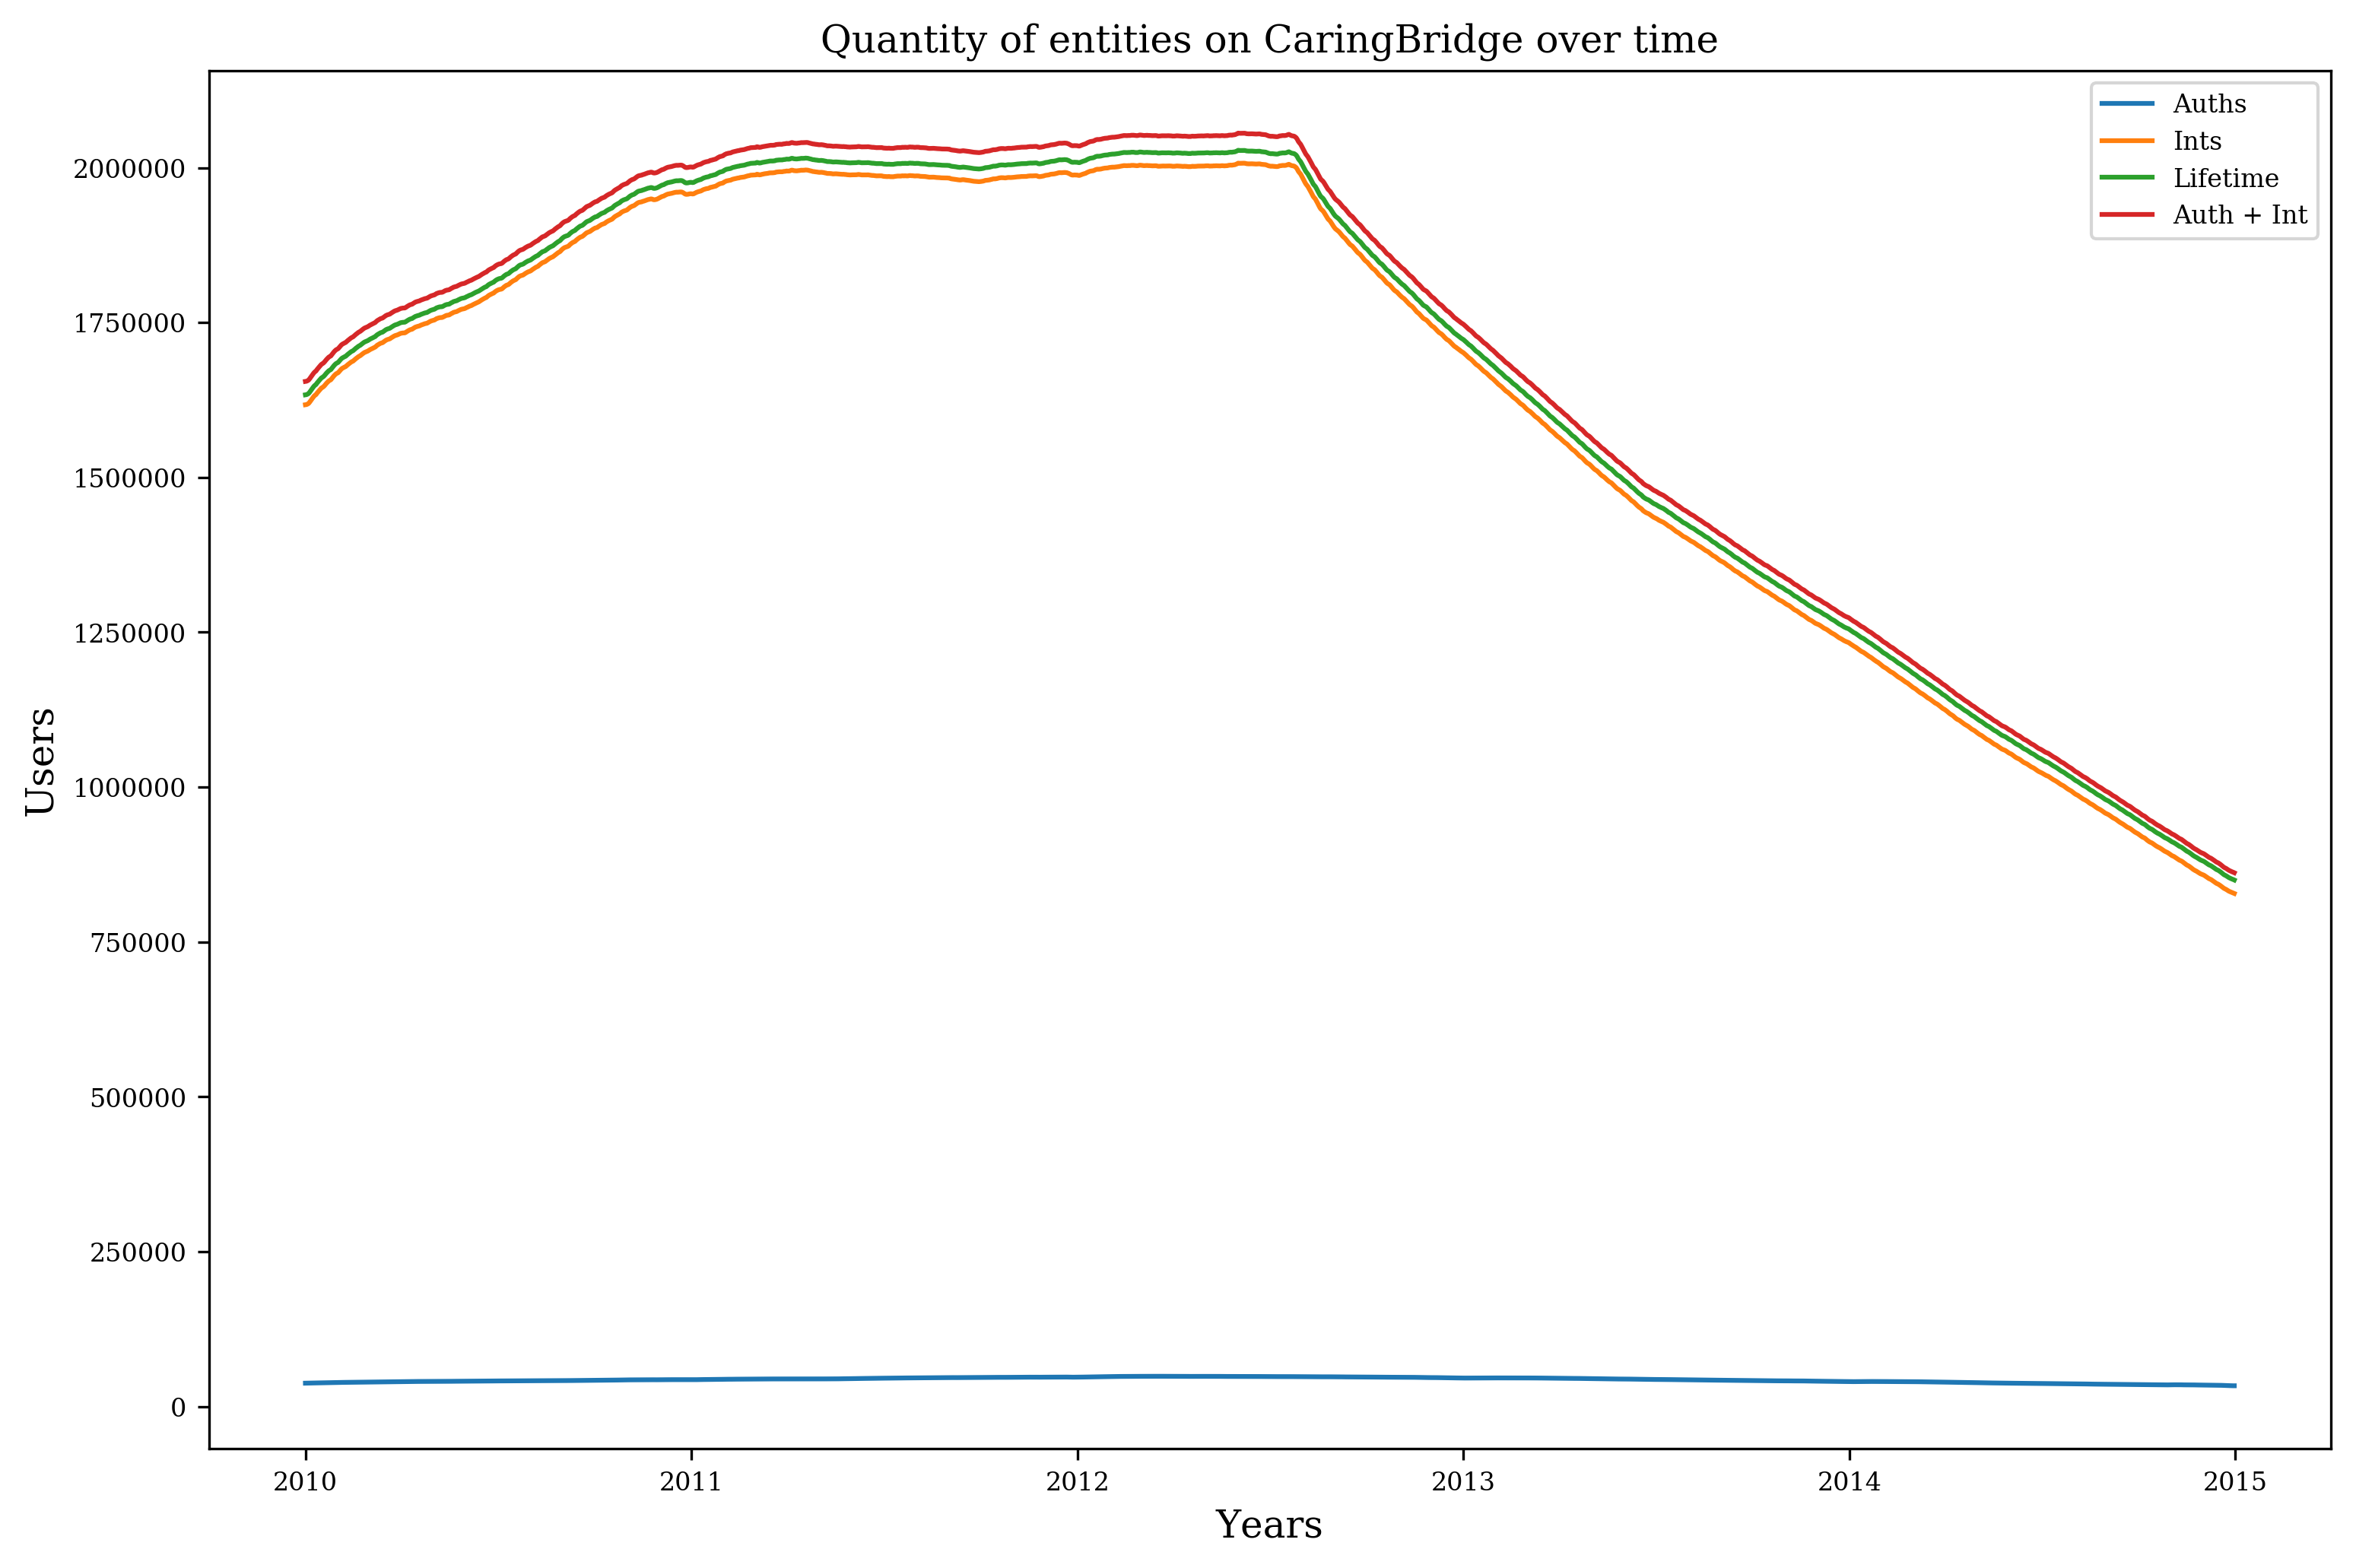

In [101]:
mpl.plot("Auths", data = df)
mpl.plot("Ints", data = df)
mpl.plot("Lifetime", data = df)
mpl.plot("Auth + Int", data = df)
labels = ('2010', '2011', '2012', '2013', '2014', '2015')
x_pos = np.arange(srt, srt + epoch_yr * len(labels), epoch_yr)
 
mpl.xticks(x_pos, labels = labels)

mpl.xlabel("Years", fontsize = em)
mpl.ylabel("Users", fontsize = em)
mpl.title("Quantity of entities on CaringBridge over time", fontsize = em)
mpl.legend()
mpl.show()

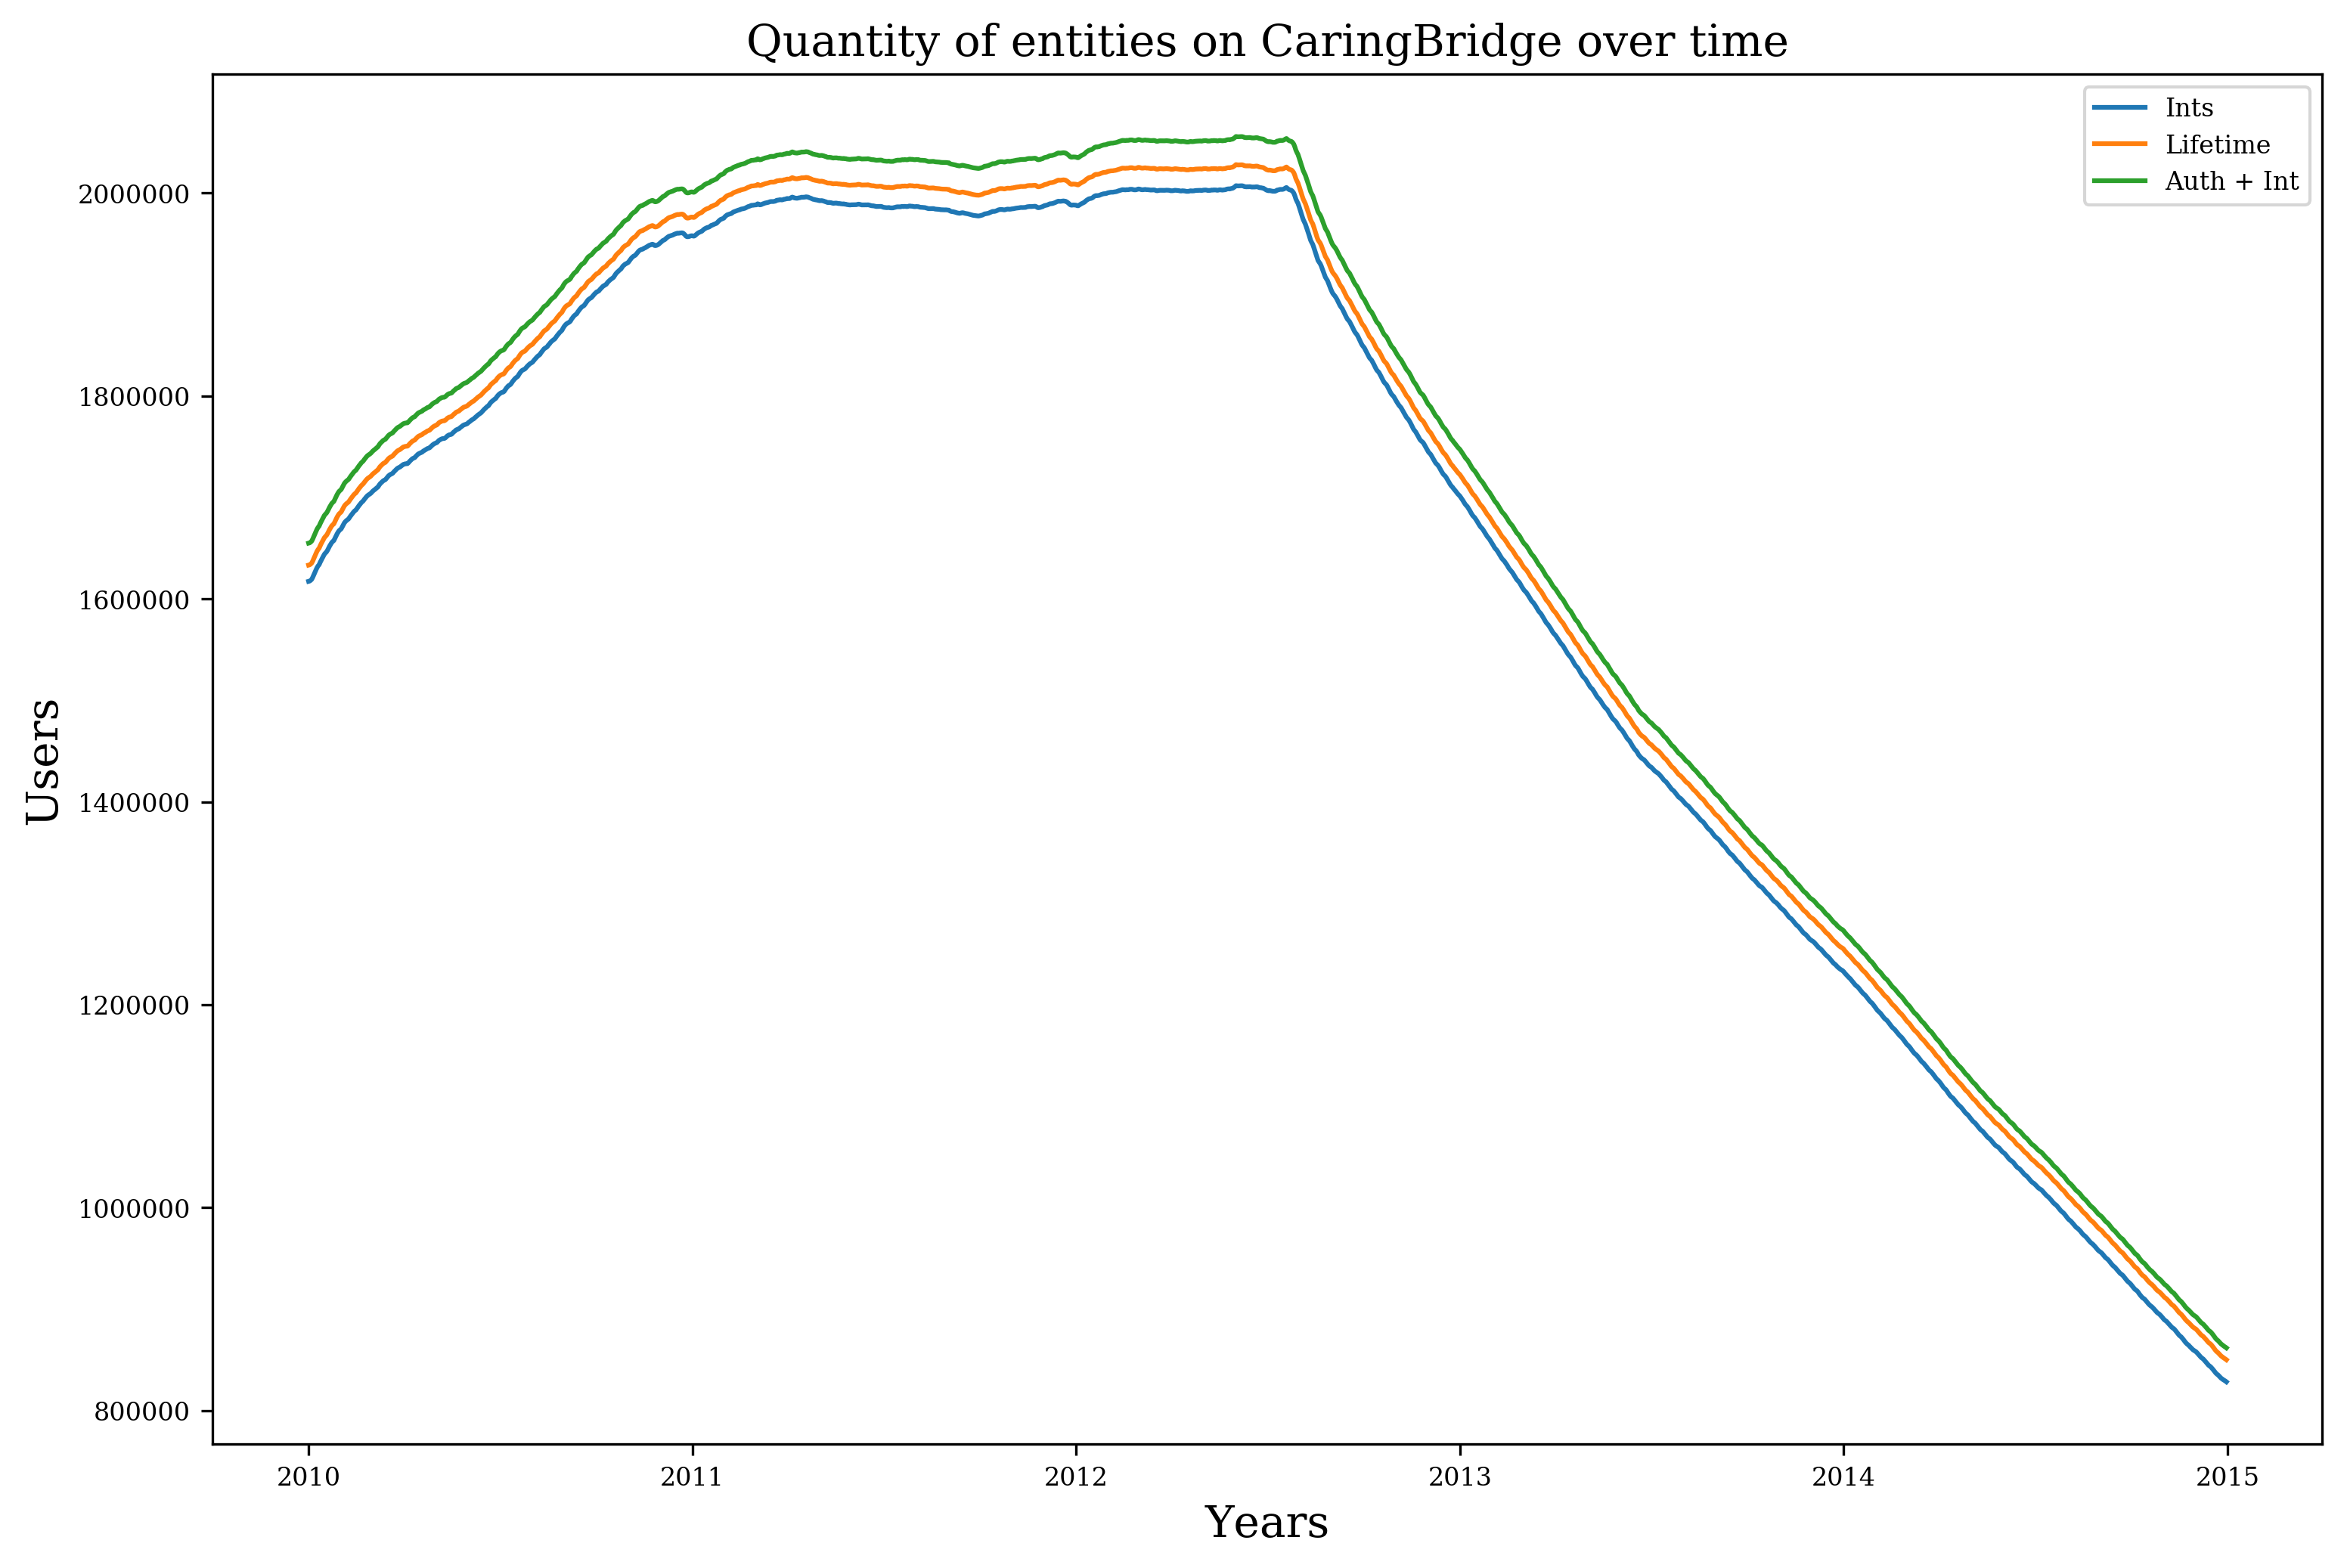

In [98]:
mpl.plot("Ints", data = df)
mpl.plot("Lifetime", data = df)
mpl.plot("Auth + Int", data = df)
labels = ('2010', '2011', '2012', '2013', '2014', '2015')
x_pos = np.arange(srt, srt + epoch_yr * len(labels), epoch_yr)
 
mpl.xticks(x_pos, labels = labels)

mpl.xlabel("Years", fontsize = em)
mpl.ylabel("Users", fontsize = em)
mpl.title("Quantity of entities on CaringBridge over time", fontsize = em)
mpl.legend()
mpl.show()

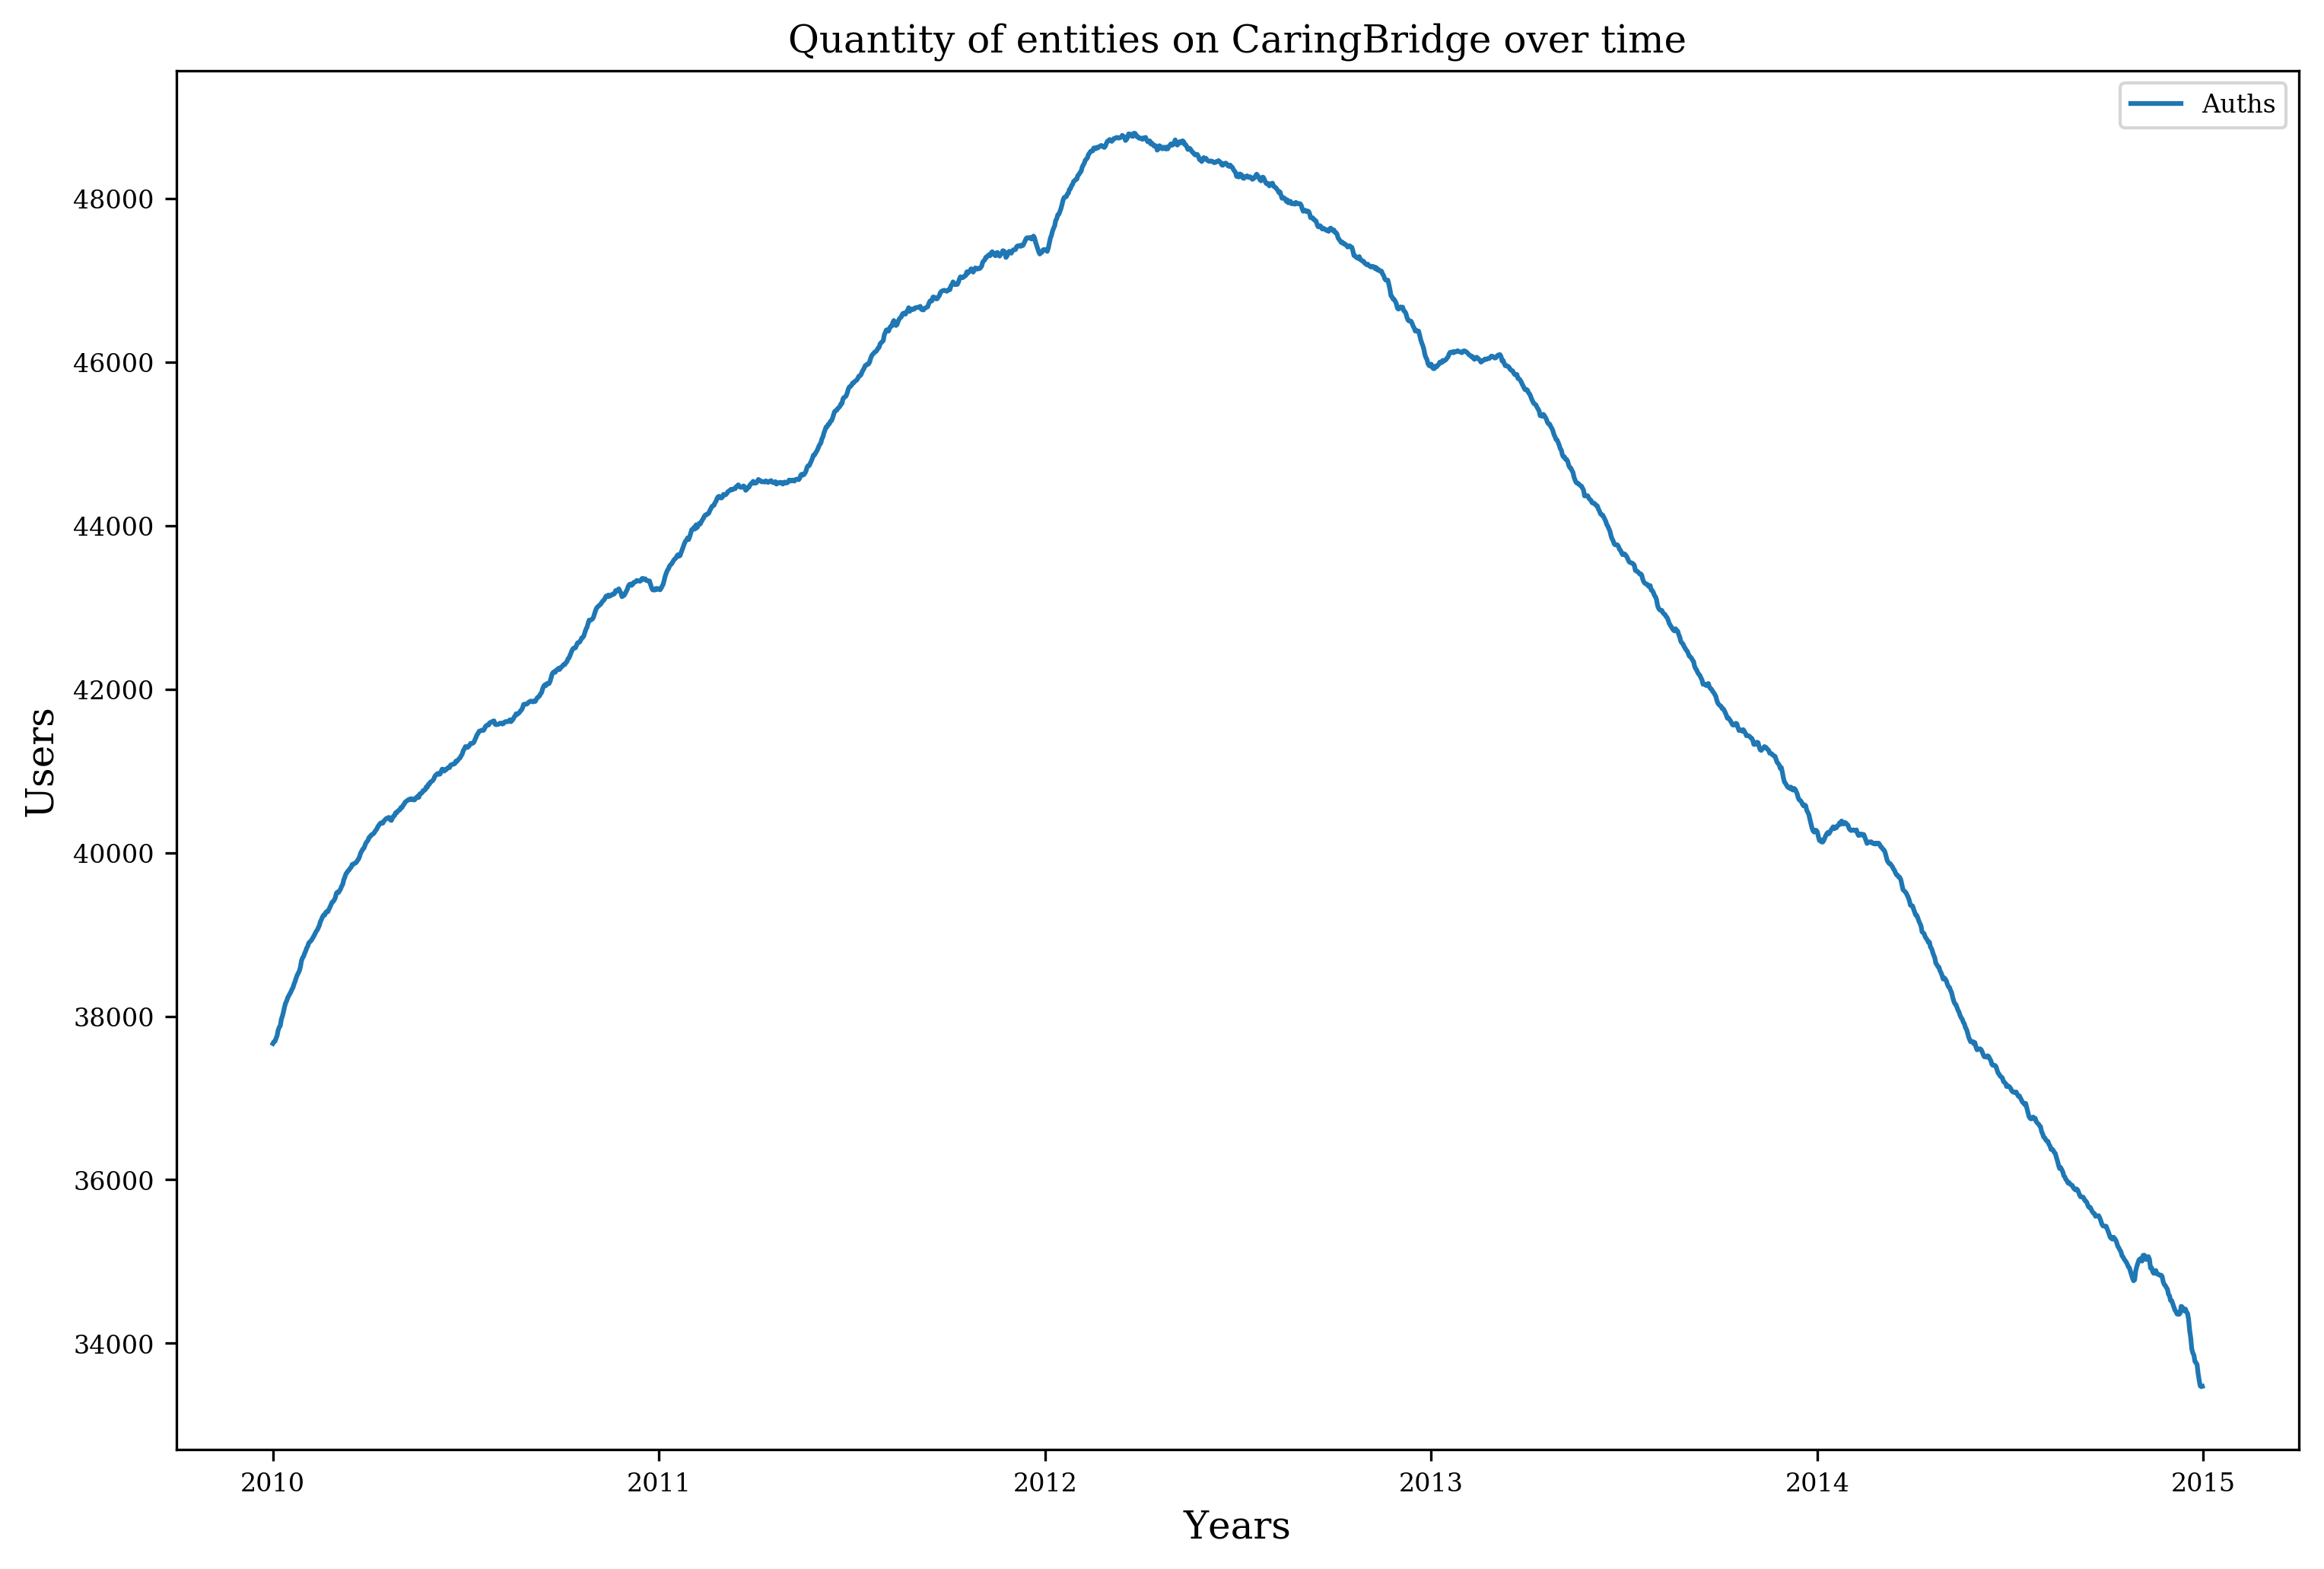

In [103]:
mpl.plot("Auths", data = df)
labels = ('2010', '2011', '2012', '2013', '2014', '2015')
x_pos = np.arange(srt, srt + epoch_yr * len(labels), epoch_yr)
 
mpl.xticks(x_pos, labels = labels)

mpl.xlabel("Years", fontsize = em)
mpl.ylabel("Users", fontsize = em)
mpl.title("Quantity of entities on CaringBridge over time", fontsize = em)
mpl.legend()
mpl.show()

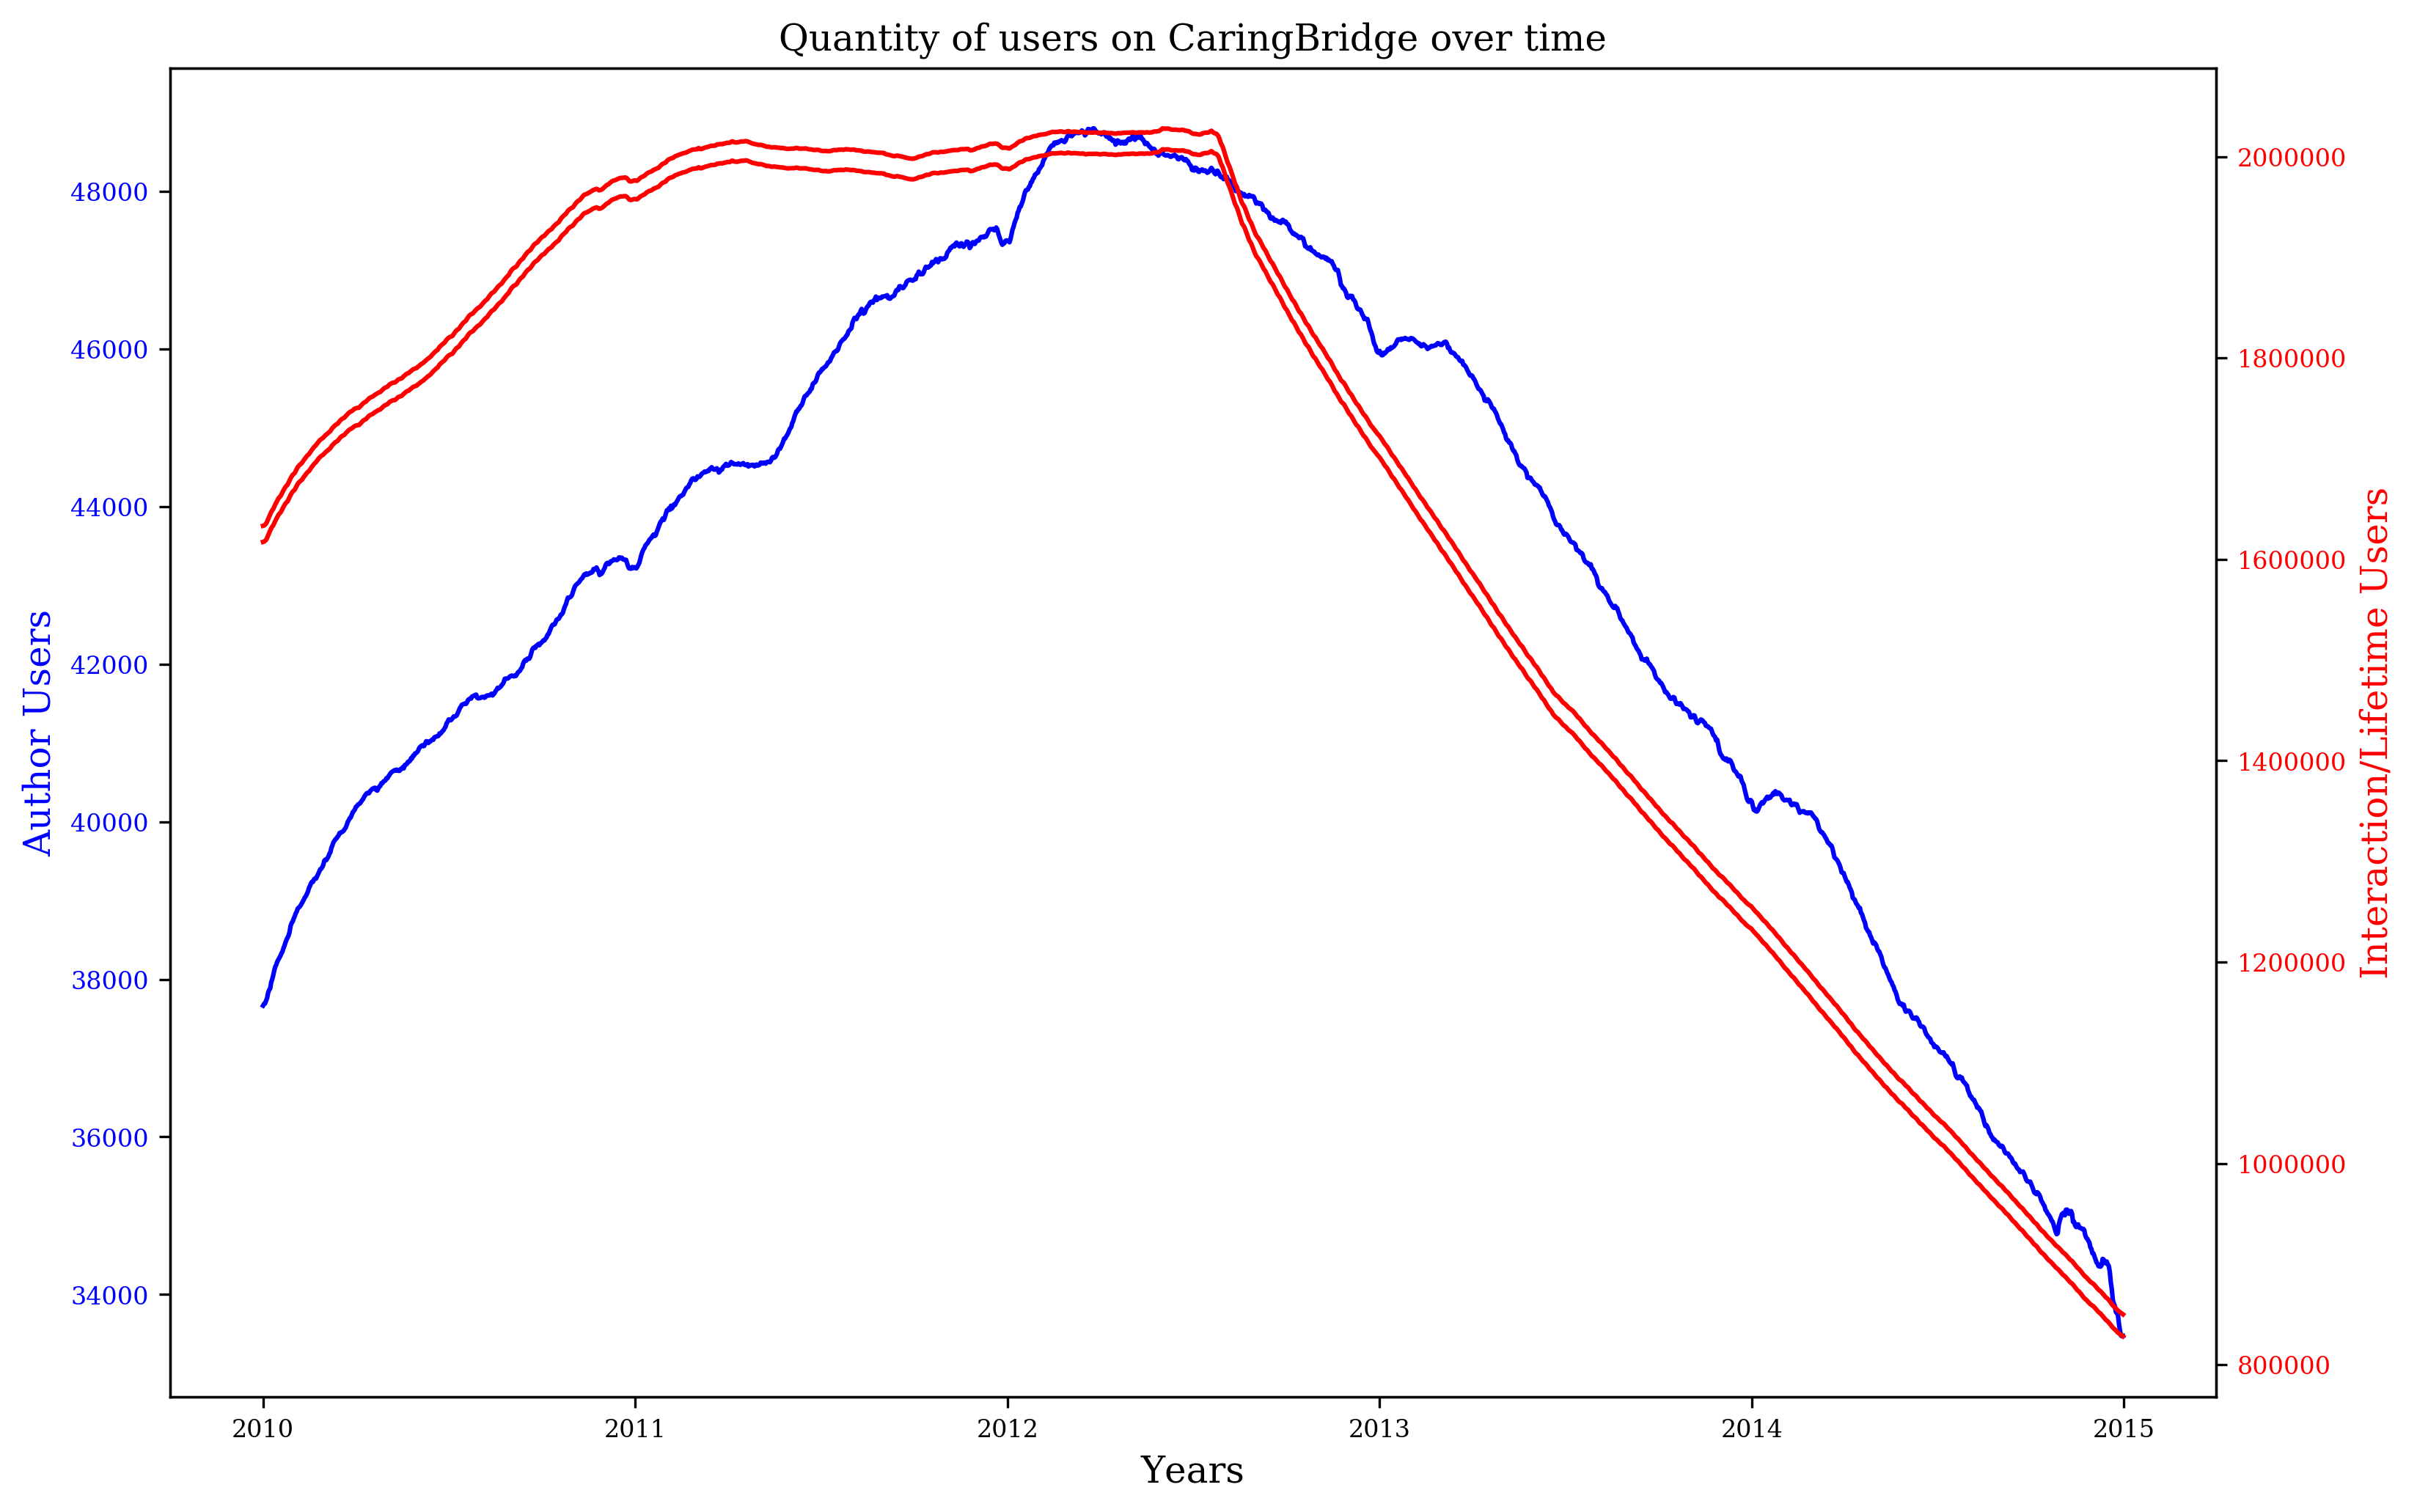

In [124]:
fig, ax = mpl.subplots()

ax.plot("Auths", color = 'b', data = df)
labels = ('2010', '2011', '2012', '2013', '2014', '2015')
x_pos = np.arange(srt, srt + epoch_yr * len(labels), epoch_yr)
 
ax.set_xticks(x_pos)
ax.set_xlabel(labels)
ax.tick_params(axis='y', labelcolor='b')

mpl.xlabel("Years", fontsize = em)
mpl.ylabel("Author Users", color = 'b', fontsize = em)
mpl.title("Quantity of users on CaringBridge over time", fontsize = em)

ax2 = ax.twinx()
ax2.plot("Ints", color = 'r', data=df)
ax2.plot("Lifetime", color = 'r', data=df)
ax2.set_ylabel('Interaction/Lifetime Users', color = 'r', fontsize = em)
ax2.tick_params(axis='y', labelcolor='r')

mpl.setp(ax, xticks=x_pos, xticklabels=labels)

#fig.legend()
mpl.show()

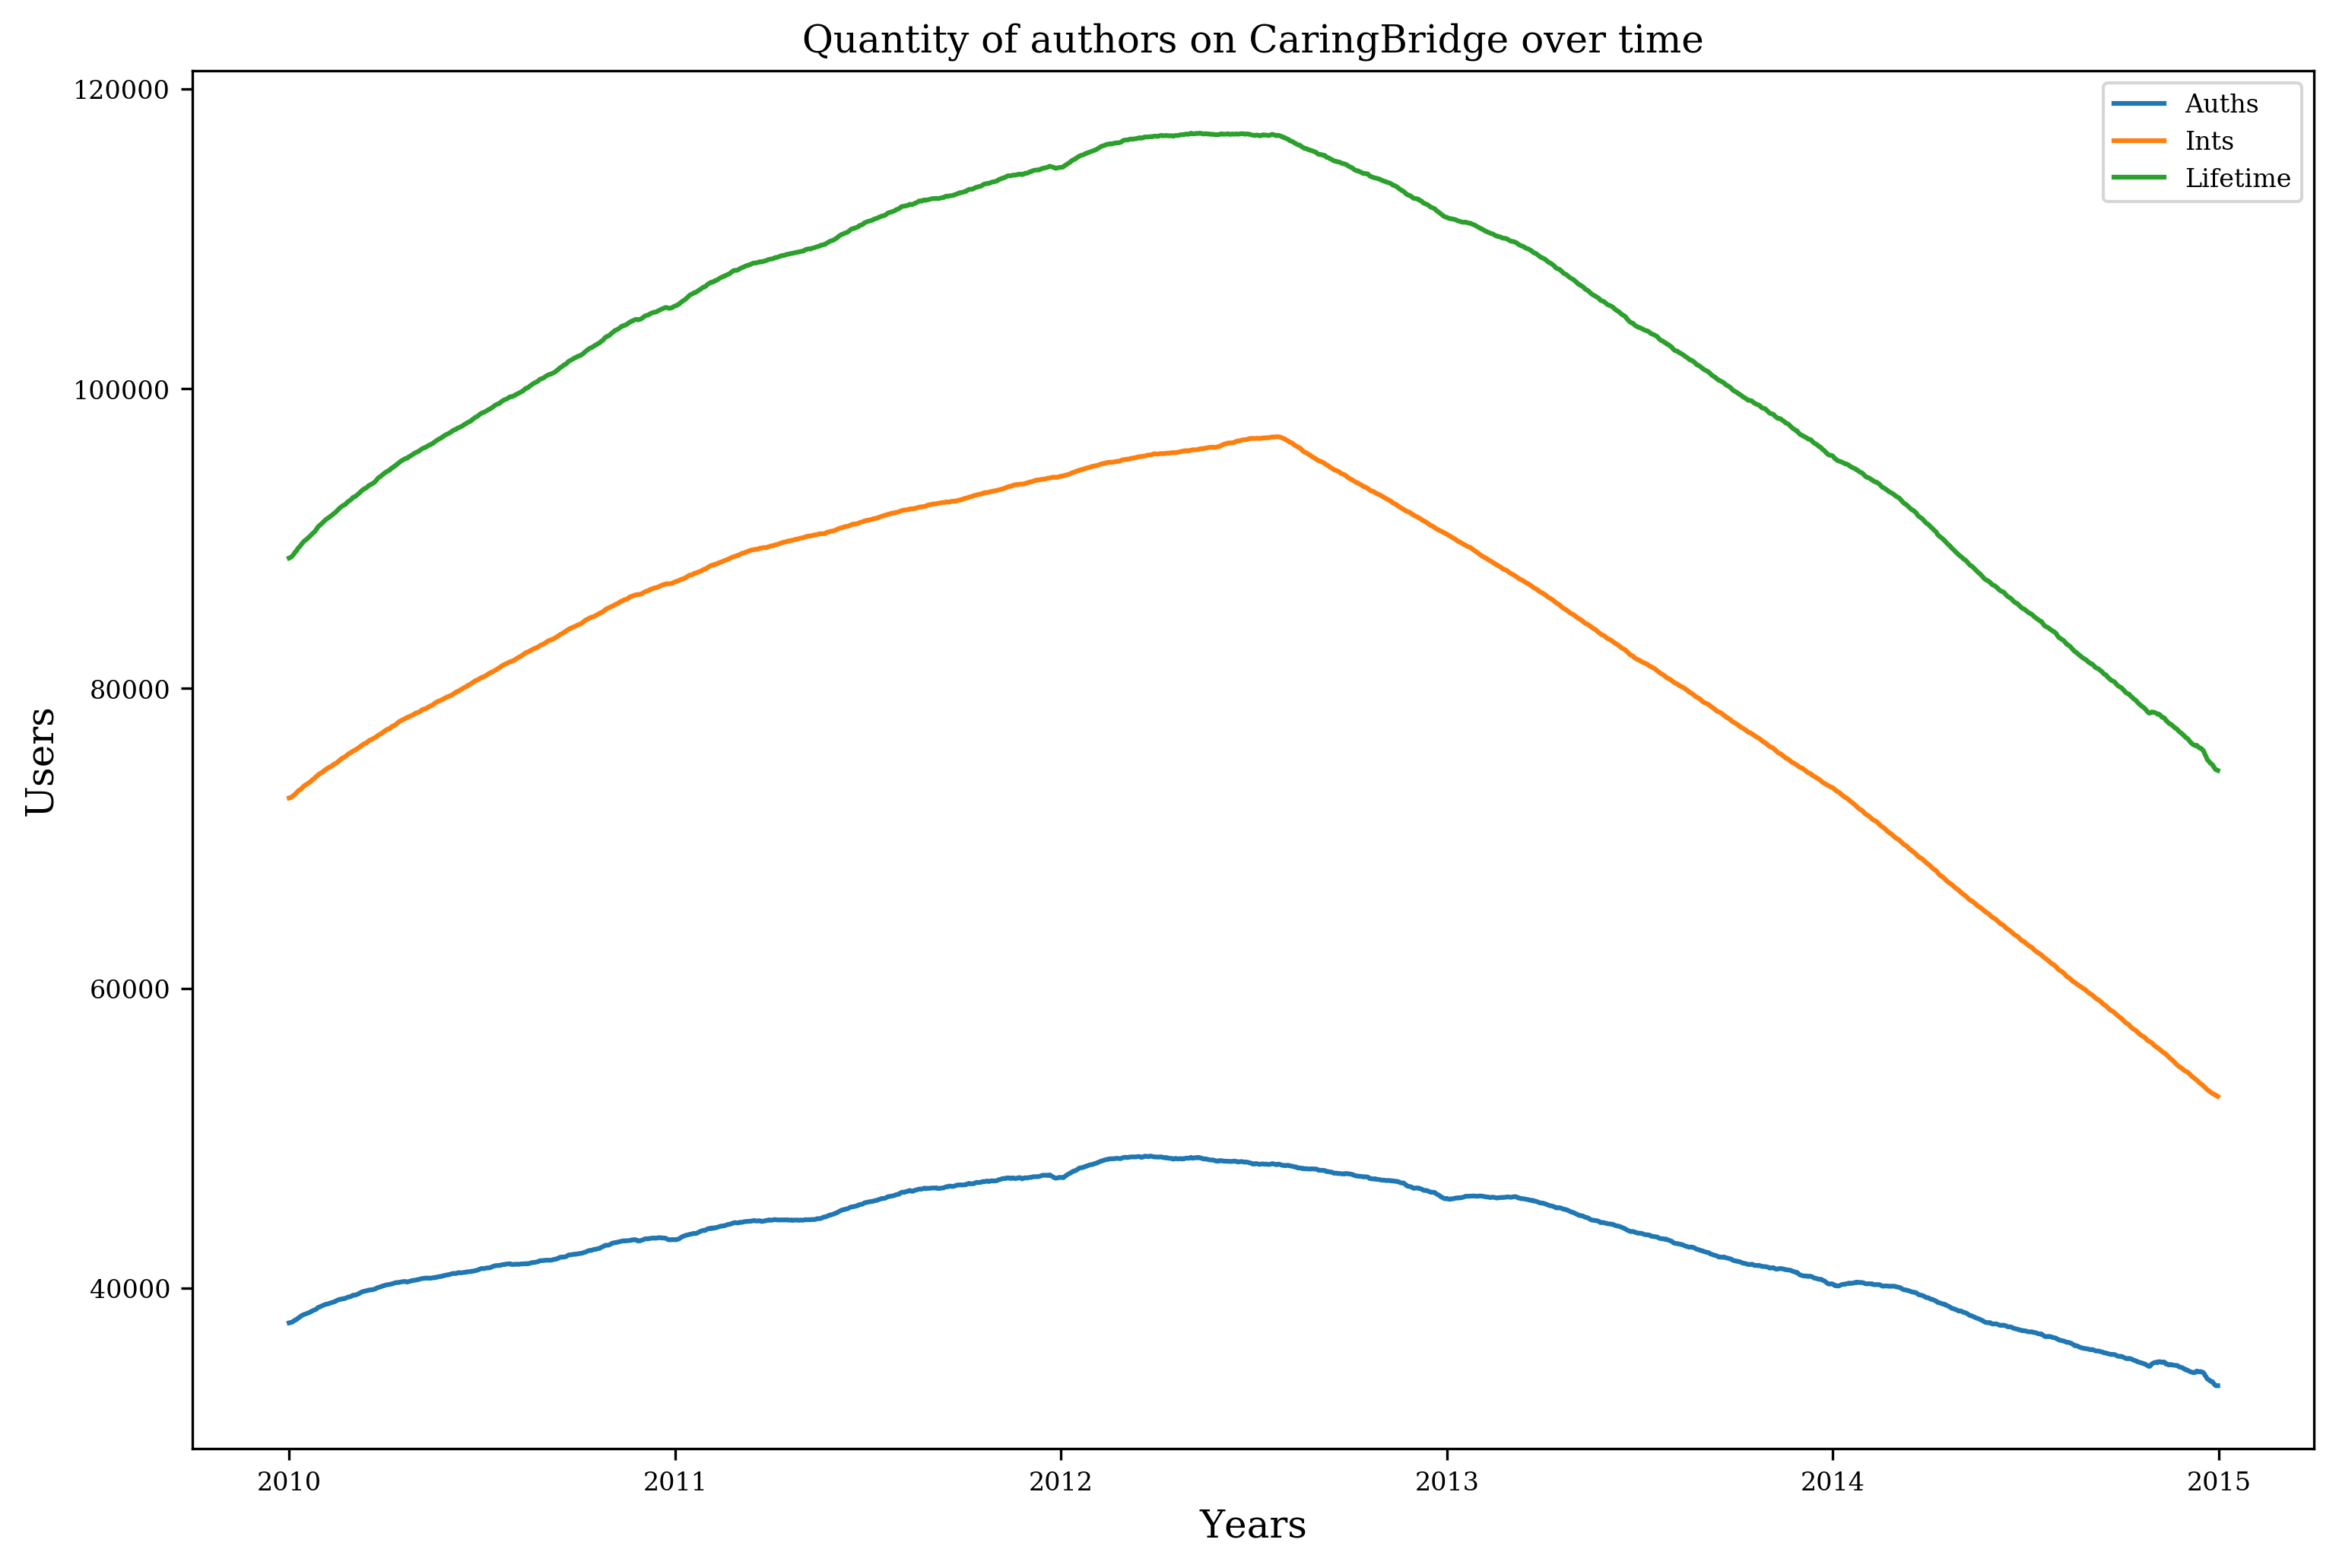

In [15]:
mpl.plot("Auths", data = df_filt)
mpl.plot("Ints", data = df_filt)
mpl.plot("Lifetime", data = df_filt)
labels = ('2010', '2011', '2012', '2013', '2014', '2015')
x_pos = np.arange(srt, srt + epoch_yr * len(labels), epoch_yr)
 
mpl.xticks(x_pos, labels = labels)

mpl.xlabel("Years", fontsize = em)
mpl.ylabel("Users", fontsize = em)
mpl.title("Quantity of authors on CaringBridge over time", fontsize = em)
mpl.legend()
mpl.show()